# Système de Lorenz

In [35]:
# import useful python packages
import numpy as np # for vector and matrix manipulations
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting nicer
from scipy.integrate import solve_ivp

sb.set_theme(context="notebook", style="ticks")

Find mode information about Scipy's solve_ivp in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). 

## Définition du système

In [38]:
def lorenz(t, y, sigma=10.0, beta=8.0/3.0, rho=28.0):
    """
    Lorenz system of differential equations.

    Parameters
    ----------
    t : float
        Time variable.
    y : array-like
        State vector [x, y, z].
    sigma : float, optional
        Prandtl number, default is 10.0.
    beta : float, optional
        Geometric factor, default is 8/3.
    rho : float, optional
        Rayleigh number, default is 28.0.

    Returns
    -------
    dydt : ndarray
        Derivatives [dx/dt, dy/dt, dz/dt].
    """
    x, y, z = y
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

## Intégration numérique

In [60]:
# system parameters
sigma = 10
beta = 8/3
rho = 28

y0 = np.array([2, -1, 0.5])  # Initial populations

# integration parameters

t_end = 50 # End time
h = 0.001  # Step size

t_span = (0, t_end)
t_eval = np.arange(0, t_end + h, h)

In [61]:
# integrate
solution = solve_ivp(lorenz, t_span, y0, method='RK45', t_eval=t_eval, args=(sigma, beta, rho))

# Extract the results
t_values = solution['t']
x = solution['y'][0, :]  
y = solution['y'][1, :]  
z = solution['y'][2, :] 

## Visualisation

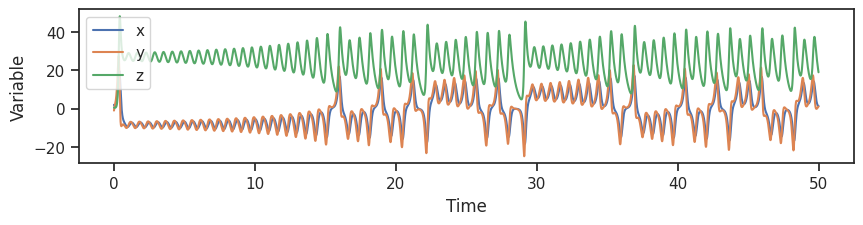

In [62]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 2))

# Plot the results
ax.plot(t_values, x, "-", label="x")
ax.plot(t_values, y, "-", label="y")
ax.plot(t_values, z, "-", label="z")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Variable')

# Add a legend
ax.legend()

# Show the plot
plt.show()


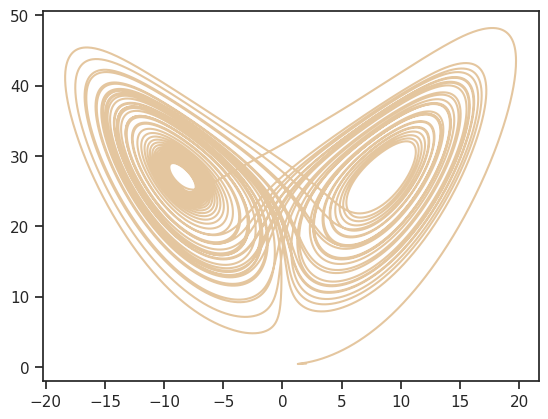

In [65]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the results
ax.plot(x, z, "-", c="burlywood", alpha=0.8)

#sb.despine(left=True, bottom=True)
#ax.set_xticks([])
#ax.set_yticks([])
# Show the plot

#plt.savefig("lorenz_attractor.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0)
plt.show()


## Sensibilité aux conditions initiales

In [66]:
perturbation_strength = 1e-5
perturbation = np.random.random(len(y0)) * perturbation_strength
y0_perturbed = y0 + perturbation

solution = solve_ivp(lorenz, t_span, y0, method='RK45', t_eval=t_eval, args=(sigma, beta, rho))
solution_perturbed = solve_ivp(lorenz, t_span, y0_perturbed, method='RK45', t_eval=t_eval, args=(sigma, beta, rho))


# Extract the results
t_values = solution['t']
x = solution['y'][0, :]  
y = solution['y'][1, :]  
z = solution['y'][2, :] 

x_p = solution_perturbed['y'][0, :]  
y_p = solution_perturbed['y'][1, :]  
z_p = solution_perturbed['y'][2, :] 

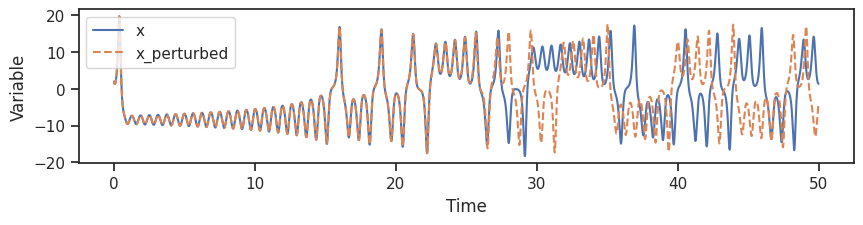

In [69]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 2))

# Plot the results
ax.plot(t_values, x, "-", label="x")
ax.plot(t_values, x_p, "--", label="x_perturbed")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Variable')

# Add a legend
ax.legend()

# Show the plot
plt.show()


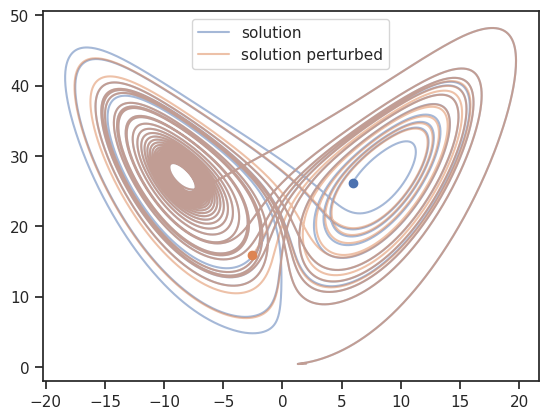

In [84]:
# Create a figure and axis object
fig, ax = plt.subplots()

i_end = 30000

# Plot the results
ax.plot(x[:i_end], z[:i_end], "-", c="b", alpha=0.5, label="solution")
ax.plot(x_p[:i_end], z_p[:i_end], "-", c="C1", alpha=0.5, label="solution perturbed")

ax.plot(x[i_end], z[i_end], 'o')
ax.plot(x_p[i_end], z_p[i_end], 'o')

ax.legend()

#plt.savefig("lorenz_attractor.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0)
plt.show()


## Exposant de Lyapunov

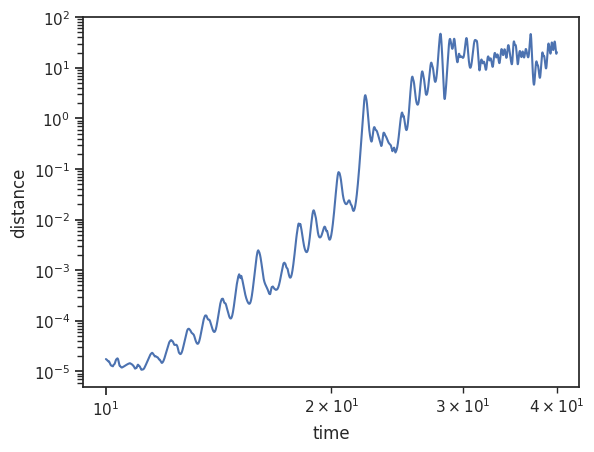

In [105]:
distance = np.linalg.norm(solution["y"] - solution_perturbed["y"], axis=0)

i_end = 40000
i_ini = 10000

fig, ax = plt.subplots()

ax.plot(t_values[i_ini:i_end], distance[i_ini:i_end])

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylabel("distance")
ax.set_xlabel("time")

plt.show()

In [108]:
norm = np.linalg.norm(solution_perturbed["y"], axis=0) 
norm_0 = np.linalg.norm(solution_perturbed["y"][:, 0], axis=0)


norm_rel = norm / norm_0
norm_rel = norm_rel[i_ini:i_end]
dt = t_values[i_end] - t_values[i_ini]

lyap = np.log(norm_rel) / dt

np.mean(lyap)

np.float64(0.07946517034503867)

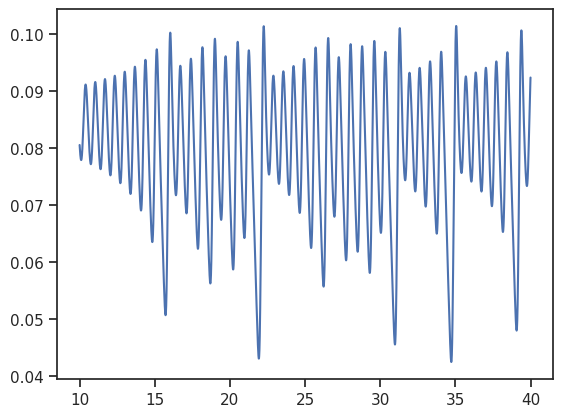

In [107]:
fig, ax = plt.subplots()

ax.plot(t_values[i_ini:i_end], lyap)